# S&P 500 - EDA and Modeling

There’s a lot you can do with a time series like this one (daily S&P 500 index values). Below are some common ideas and approaches:

---

## 1. Data Cleaning and Preparation

- **Check for missing values**: Real-world time series often have missing data (e.g., weekends or holidays if you have daily financial data). Make sure you account for non-trading days or fill the data in a consistent way.
- **Resampling**: If you need a specific frequency (e.g., weekly or monthly), you can resample daily data. For instance:
  ```python
  # Resample to monthly frequency, taking the last value of each month
  monthly_data = index_df.resample('M', on='Date').last()
  ```
  
---

## 2. Visualization

- **Line Plot**: The simplest plot to see the overall trend, which you’ve already done.
- **Moving Averages**: Compute short-term (e.g., 20-day) or long-term (e.g., 50-day, 200-day) rolling means to see how the index behaves over time.
  ```python
  index_df['MA_20'] = index_df['S&P500'].rolling(window=20).mean()
  index_df['MA_50'] = index_df['S&P500'].rolling(window=50).mean()
  ```
  Then plot them on top of the original series to visualize trends and smoothing.

---

## 3. Stationarity Testing and Detrending

For many forecasting models (ARIMA, SARIMA, etc.), it’s useful to have a stationary series:

- **Stationarity Tests**: Use the **Augmented Dickey-Fuller (ADF)** test or **KPSS** test to check if the series is stationary (i.e., mean and variance do not change over time).
  ```python
  from statsmodels.tsa.stattools import adfuller
  
  result = adfuller(index_df['S&P500'].dropna())
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])
  ```
- **Differencing**: If the series isn’t stationary, you can difference it:
  ```python
  index_df['diff'] = index_df['S&P500'].diff()
  ```
  This often helps remove trends.

---

## 4. Decomposition

You can break the series into **trend, seasonality, and residual** components:

```python
import statsmodels.api as sm

# Convert 'Date' column to datetime if not already done
index_df['Date'] = pd.to_datetime(index_df['Date'])
index_df.set_index('Date', inplace=True)

decomposition = sm.tsa.seasonal_decompose(index_df['S&P500'], model='additive')
decomposition.plot()
```

This helps visualize if there’s a strong trend or seasonal pattern (though the S&P 500 daily data typically has more cyclical or irregular patterns than strict seasonality).

---

## 5. Auto-Correlation Analysis

- **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots help you understand the correlation of the series with its own lags, which is useful for selecting ARIMA parameters.
  ```python
  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

  plot_acf(index_df['S&P500'].dropna(), lags=30)
  plot_pacf(index_df['S&P500'].dropna(), lags=30)
  plt.show()
  ```

---

## 6. Time Series Modeling and Forecasting

### ARIMA / SARIMA Models

- **ARIMA** (AutoRegressive Integrated Moving Average) is a classic model for time series forecasting.
- **SARIMA** (Seasonal ARIMA) extends ARIMA to handle seasonality explicitly, though daily stock data seasonality is often driven by business cycles rather than a weekly or monthly pattern.

Example ARIMA approach:
```python
from statsmodels.tsa.arima.model import ARIMA

# Assuming stationarity or after differencing
model = ARIMA(index_df['S&P500'], order=(p, d, q))  # Choose p, d, q based on ACF/PACF
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Forecast 30 days
print(forecast)
```

### Other Approaches

- **VAR (Vector Autoregression)**: If you have multiple time series (e.g., S&P 500, interest rates, other indexes), you can model them together.
- **State-Space Models** (e.g., **Kalman Filter**): More advanced technique for time-varying processes.
- **Machine Learning Models** (e.g., **Random Forest**, **XGBoost**, **LSTM neural networks**): You can frame this as a supervised learning problem with features (lags, technical indicators, external data) predicting future values.

---

## 7. Performance Evaluation

After you build a model, you’ll want to evaluate it:
- **Train-Test Split**: Split your time series into a training set (e.g., first 80%) and a test set (last 20%). 
- **Rolling Forecast Origin** or **Walk-Forward Validation**: More robust way to simulate how a model performs over time.
- **Error Metrics**: Compute metrics like **RMSE**, **MAE**, or **MAPE** to see how well your forecasts match actual data.

---

## 8. Feature Engineering

For more advanced modeling, you might engineer additional features:
- **Returns**: Daily returns, log returns, etc.
- **Volatility Measures**: Rolling standard deviation.
- **Market Indicators**: If you have data on volumes, sentiment, or macroeconomic indicators, you can incorporate these into predictive models.

---

## 9. Correlation with Other Indicators

You could also look at how the S&P 500 correlates with:
- Other stock indices (NASDAQ, Dow Jones, etc.).
- Macroeconomic variables (unemployment rates, interest rates, etc.).
- Sentiment or news data.

---

### Summary

With time series data like the S&P 500, you can do a lot more than just plotting. From decomposing trends and testing stationarity to building sophisticated forecasting models and evaluating their performance, there’s a wide range of techniques. The best path depends on your specific goals—whether it’s short-term trading signals, long-term forecasting, or explanatory analysis of what drives market movements.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
import pandas as pd

# Load the CSV files into DataFrames
stocks_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_stocks.csv')
companies_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_companies.csv')
index_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

In [3]:
# Explore the index DataFrame
print("\nIndex DataFrame:")
print(index_df.head())
print(index_df.info())
print(index_df.describe())


Index DataFrame:
         Date   S&P500
0  2014-12-22  2078.54
1  2014-12-23  2082.17
2  2014-12-24  2081.88
3  2014-12-26  2088.77
4  2014-12-29  2090.57
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB
None
            S&P500
count  2517.000000
mean   3346.351605
std    1078.204274
min    1829.080000
25%    2428.370000
50%    2999.910000
75%    4199.120000
max    6090.270000


This code converts the 'Date' column into datetime format and sets it as the DataFrame's index, enabling time-based operations. Then, it creates a complete range of business days over the data's time span, reindexes the DataFrame to include these days (inserting missing values for non-trading days), and fills the gaps using forward-fill.

In [4]:
import pandas as pd

# Sample DataFrame (index_df) with 'Date' and 'S&P500' columns
# index_df = pd.read_csv('/kaggle/input/sp-500-stocks/sp500_index.csv')

# 1. Convert 'Date' to datetime
index_df['Date'] = pd.to_datetime(index_df['Date'])

# 2. Set 'Date' as the index
index_df.set_index('Date', inplace=True)

# 3. Create a full range of business days from the earliest to latest date in the dataset
all_business_days = pd.date_range(start=index_df.index.min(), 
                                  end=index_df.index.max(), 
                                  freq='B')  # 'B' for business days

# 4. Reindex to this new date range, introducing missing values for days that weren't in the original data
index_df = index_df.reindex(all_business_days)

# 5. Fill missing values (e.g., forward fill) using .ffill() assignment
index_df['S&P500'] = index_df['S&P500'].ffill()

# Now index_df has a row for every business day, and non-trading days have been forward-filled.

In [5]:
index_df.head(20)

,S&P500
2014-12-22,2078.54
2014-12-23,2082.17
2014-12-24,2081.88
2014-12-25,2081.88
2014-12-26,2088.77
2014-12-29,2090.57
2014-12-30,2080.35
2014-12-31,2058.90
2015-01-01,2058.90
2015-01-02,2058.20


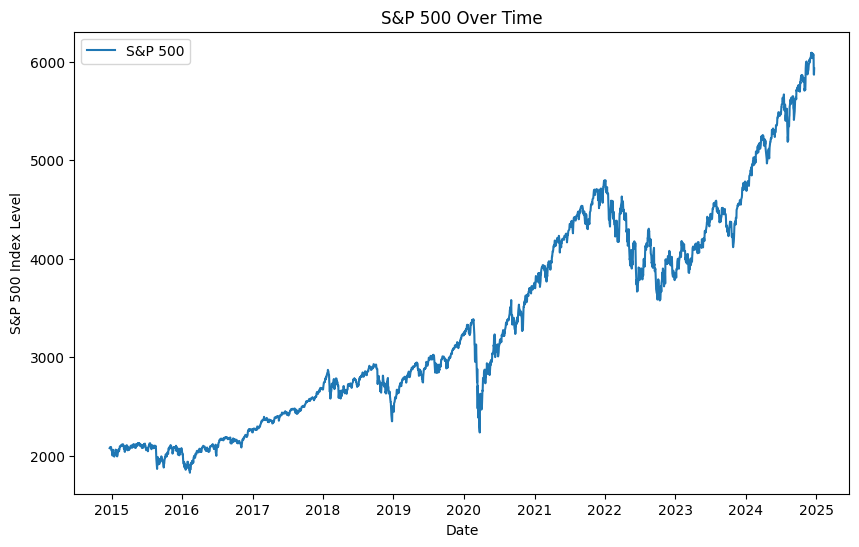

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume index_df is already loaded and 'Date' is its index
index_df.index = pd.to_datetime(index_df.index)

plt.figure(figsize=(10, 6))
plt.plot(index_df.index, index_df['S&P500'], label='S&P 500')

plt.xlabel('Date')
plt.ylabel('S&P 500 Index Level')
plt.title('S&P 500 Over Time')
plt.legend()

plt.show()

In [7]:
index_df['MA_20'] = index_df['S&P500'].rolling(window=20).mean()
index_df['MA_50'] = index_df['S&P500'].rolling(window=50).mean()

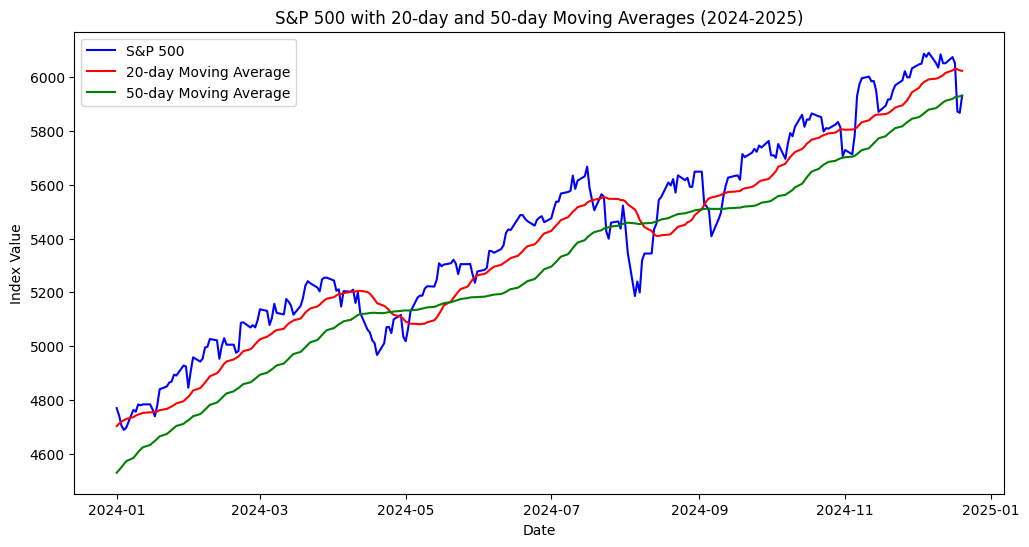

In [8]:
import matplotlib.pyplot as plt

# Filter the DataFrame to only include dates in 2024 and 2025.
filtered_df = index_df.loc['2024':'2025']

plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['S&P500'], label='S&P 500', color='blue')
plt.plot(filtered_df.index, filtered_df['MA_20'], label='20-day Moving Average', color='red')
plt.plot(filtered_df.index, filtered_df['MA_50'], label='50-day Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('S&P 500 with 20-day and 50-day Moving Averages (2024-2025)')
plt.legend()
plt.show()

## Models

### ARIMA

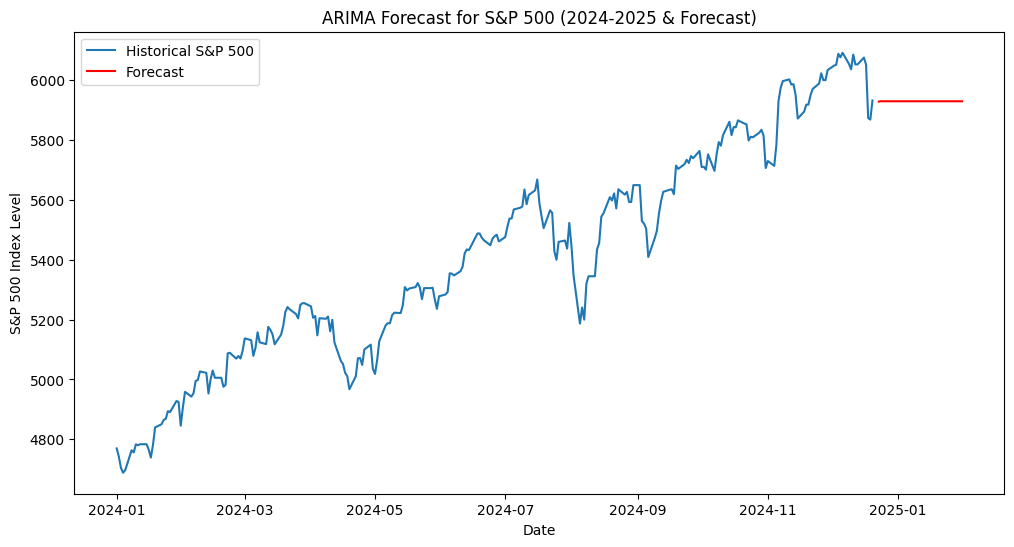

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure index_df is already loaded and has a datetime index.
# For example:
# index_df['Date'] = pd.to_datetime(index_df['Date'])
# index_df.set_index('Date', inplace=True)

# Define ARIMA model parameters (p, d, q)
order = (1, 1, 1)

# Create and fit the ARIMA model
model = ARIMA(index_df['S&P500'], order=order)
model_fit = model.fit()

# Forecast the next 30 periods
forecast = model_fit.forecast(steps=30)

# Filter historical data to only include dates from 2024 and 2025
filtered_df = index_df.loc['2024':'2025']

plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['S&P500'], label='Historical S&P 500')
plt.plot(forecast.index, forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('S&P 500 Index Level')
plt.title('ARIMA Forecast for S&P 500 (2024-2025 & Forecast)')
plt.legend()
plt.show()

### SARIMA

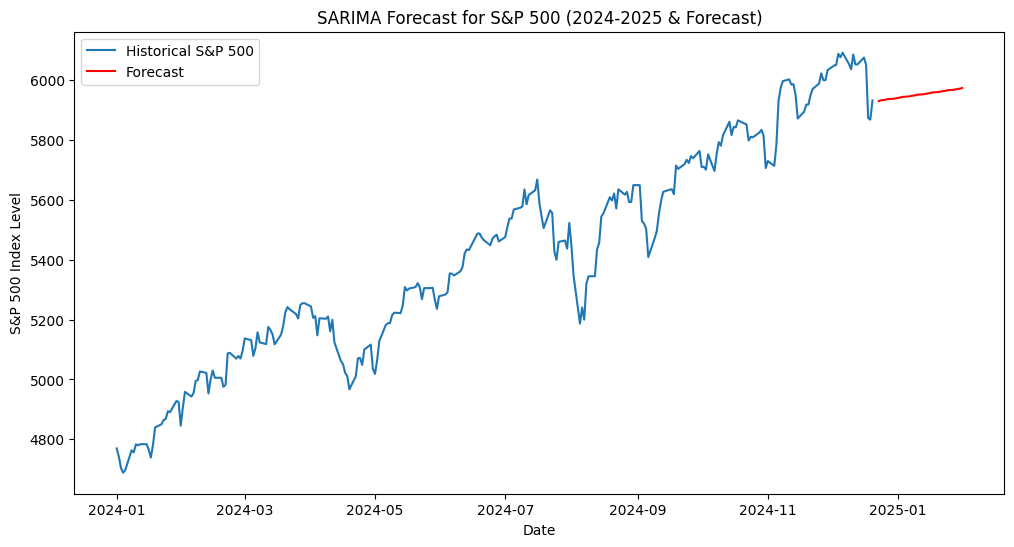

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure that index_df has a datetime index and the 'S&P500' column.
# For example, if not already set:
# index_df['Date'] = pd.to_datetime(index_df['Date'])
# index_df.set_index('Date', inplace=True)

# Define the SARIMA model parameters
order = (1, 1, 1)                   # Non-seasonal order
seasonal_order = (1, 1, 1, 5)         # Seasonal order with period=5

# Create and fit the SARIMA model
model = SARIMAX(index_df['S&P500'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast the next 30 periods
forecast = model_fit.forecast(steps=30)

# Filter the historical data to only include dates from 2024 and 2025
filtered_df = index_df.loc['2024':'2025']

plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['S&P500'], label='Historical S&P 500')
plt.plot(forecast.index, forecast, label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('S&P 500 Index Level')
plt.title('SARIMA Forecast for S&P 500 (2024-2025 & Forecast)')
plt.legend()
plt.show()
